#January-March 2021 Dataset
###This dataset looks at  the experience of learning during covid for the year 11 students (they were in year 10 during first lockfdown). It looks at students from most deprived and least depreived backgrounds

###Rows:show responses 
###Columns:>
###Classifier: Groups certain questions 
###Questions: Specific survey questions asked 
###Response: answers/options for each question
###All persons: Overall response by percentage 
###Most deprived: Children from deprived areas 
###Least deprived: Children from least deprived areas 
###ULC looks at Upper confidence limit for each group (precision of percentage estimates)
###LCL looks at Lower confidence limit for each group (precision of percentage estimates)

##Understanding the quintiles 
###The quintiles in the dataset represents different levels of deprivation within the population.
###Most deprived: Most disadvantaged group 
###2nd quintile: Less disadvantegd than the most deprived group 
###3rd quintile: Middle group , average group
###4th quintile: This group is better off than the median 
###Least deprived: Themost advantaged group

##What  is explored in the survey?



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
import pandas as pd 
pd.set_option('display.max_colwidth', None)
df = pd.read_csv(r'../../4_integrated_csv_files/education_data/experiences_of_education_and_learning_during_the_third_lockdown_january_to_march_2021_by_income-related_deprivation.csv', index_col=0)
df.reset_index(drop=True, inplace=True)
df.index +=1
df

,classifier,questions,response,All persons %,Most deprived %,2nd quintile %,3rd quintile %,4th quintile %,Least deprived %,All persons LCL,...,Most deprived LCL,Most deprived UCL,2nd quintile LCL,2nd quintile UCL,3rd quintile LCL,3rd quintile UCL,4th quintile LCL,4th quintile UCL,Least deprived LCL,Least deprived UCL
1,NaN,"Between January and March 2021, when you were in Year 11, schools were closed to most students as part of the national lockdown.\nDid you attend school in person during this time, even if only for a few days or on a part-time basis?",Did not attend school in person,83,79,81,83,86,87,82,...,77,80,79,83,81,85,83,88,85,89
2,NaN,"Between January and March 2021, when you were in Year 11, schools were closed to most students as part of the national lockdown.\nDid you attend school in person during this time, even if only for a few days or on a part-time basis?",Attended school in person,17,21,19,17,14,13,16,...,20,23,17,21,15,19,12,17,11,15
3,NaN,"Still thinking about the period of disruption in Year 11 – that is, January to March 2021.\nAt that time, did your school provide any real-time online learning which involved logging on and joining a lesson at a specific time, even if you didn’t personally attend? [note 2]","Yes, for subject lessons",87,81,84,89,90,93,86,...,79,83,82,86,87,90,88,91,91,94
4,NaN,"Still thinking about the period of disruption in Year 11 – that is, January to March 2021.\nAt that time, did your school provide any real-time online learning which involved logging on and joining a lesson at a specific time, even if you didn’t personally attend? [note 2]","Yes, for other reasons",20,15,18,19,24,23,19,...,14,17,16,20,17,21,22,26,21,26
5,NaN,"Still thinking about the period of disruption in Year 11 – that is, January to March 2021.\nAt that time, did your school provide any real-time online learning which involved logging on and joining a lesson at a specific time, even if you didn’t personally attend? [note 2]",No,6,8,7,5,4,3,5,...,7,9,6,9,4,6,3,5,2,5
6,Among those who reported that their school provided real-time online learning for subject lessons:,"Thinking only about your subject lessons, on average, during the period of disruption in Year 11 – that is, January to March 2021 – about how many live online lessons did you attend?",NaN,3,4,3,3,2,2,2,...,3,5,2,4,2,4,1,3,1,3
7,Among those who reported that their school provided real-time online learning for subject lessons:,"Thinking only about your subject lessons, on average, during the period of disruption in Year 11 – that is, January to March 2021 – about how many live online lessons did you attend?",Less than one a week,3,4,3,3,2,2,3,...,3,5,3,5,2,5,1,3,1,3
8,Among those who reported that their school provided real-time online learning for subject lessons:,"Thinking only about your subject lessons, on average, during the period of disruption in Year 11 – that is, January to March 2021 – about how many live online lessons did you attend?",1 to 4 per week,14,17,16,14,12,11,13,...,16,19,14,18,12,16,10,14,9,14
9,Among those who reported that their school provided real-time online learning for subject lessons:,"Thinking only about your subject lessons, on average, during the period of disruption in Year 11 – that is, January to March 2021 – about how many live online lessons did you attend?",1 to 2 per day,13,11,13,12,13,13,11,...,10,13,12,15,11,15,11,15,11,16
10,Among those who reported that their school provided real-time online learning for subject lessons:,"Thinking only about your subject lessons, on average, during the period of disruption in Year 11 – that is, January to March 2021 – about how many live online lessons did you attend?",3 or more per day,68,64,64,67,71,72,66,...,61,67,61,67,64,70,68,74,69,75


In [18]:
df_numeric = df.select_dtypes(include=['float', 'int'])


In [19]:
df_numeric

,All persons %,Most deprived %,2nd quintile %,3rd quintile %,4th quintile %,Least deprived %,All persons LCL,All persons UCL,Most deprived LCL,Most deprived UCL,2nd quintile LCL,2nd quintile UCL,3rd quintile LCL,3rd quintile UCL,4th quintile LCL,4th quintile UCL,Least deprived LCL,Least deprived UCL
1,83,79,81,83,86,87,82,84,77,80,79,83,81,85,83,88,85,89
2,17,21,19,17,14,13,16,18,20,23,17,21,15,19,12,17,11,15
3,87,81,84,89,90,93,86,88,79,83,82,86,87,90,88,91,91,94
4,20,15,18,19,24,23,19,21,14,17,16,20,17,21,22,26,21,26
5,6,8,7,5,4,3,5,6,7,9,6,9,4,6,3,5,2,5
6,3,4,3,3,2,2,2,3,3,5,2,4,2,4,1,3,1,3
7,3,4,3,3,2,2,3,3,3,5,3,5,2,5,1,3,1,3
8,14,17,16,14,12,11,13,15,16,19,14,18,12,16,10,14,9,14
9,13,11,13,12,13,13,11,14,10,13,12,15,11,15,11,15,11,16
10,68,64,64,67,71,72,66,70,61,67,61,67,64,70,68,74,69,75


# Visualisation

### The next codes contain visuals of the data using seaborn and or Matplotlib 

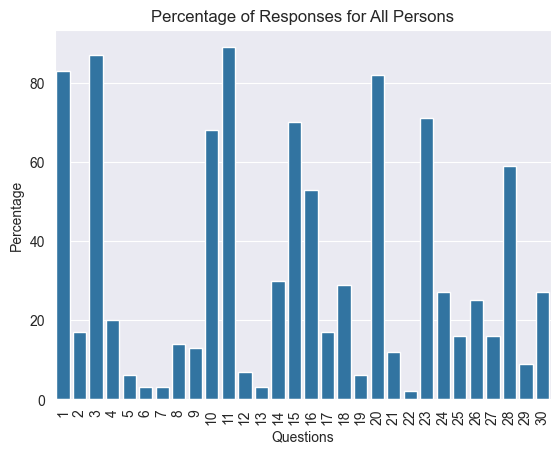

In [10]:
# bar plot to help visulise the percentage of response across different quintiles
# all persons against  questions 
plt.Figure(figsize=(10, 6))
sns.barplot(x=df.index, y=df['All persons %'])
plt.xticks(rotation=90)
plt.title('Percentage of Responses for All Persons')
plt.xlabel('Questions')
plt.ylabel('Percentage')
plt.show()

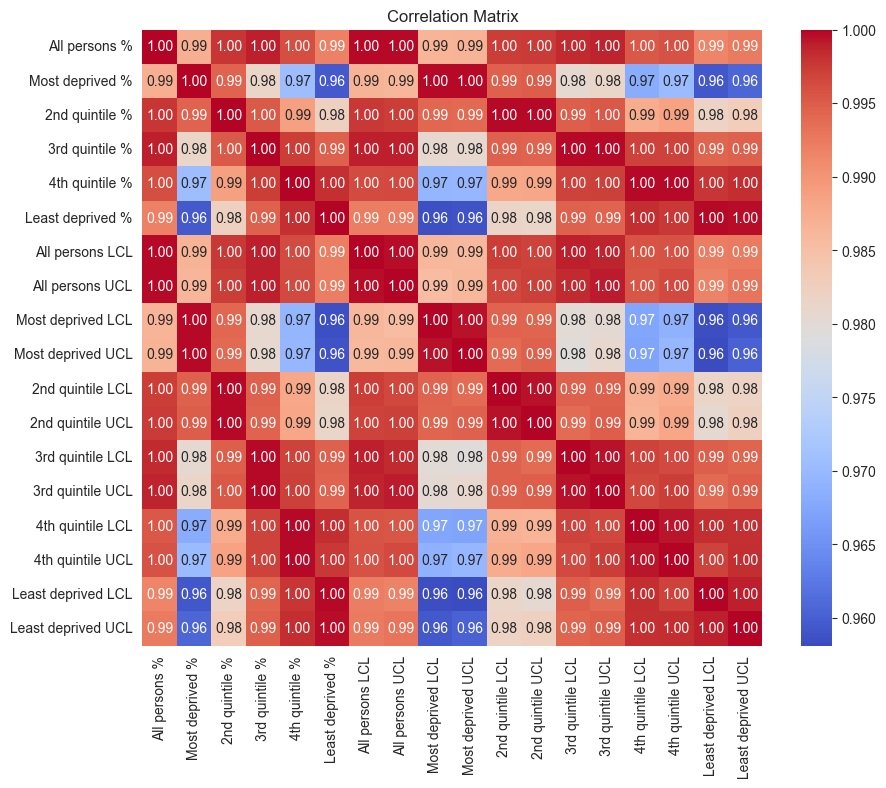

In [11]:
# Data visuliastion 

# heatmap for correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Question 1 
1st Question: Between January and March 2021, when you were in Year 11, schools were closed to most students as part of the national lockdown.
Did you attend school in person during this time, even if only for a few days or on a part-time basis?
Response to the first Question: Did not attend school in person


1st Question: Between January and March 2021, when you were in Year 11, schools were closed to most students as part of the national lockdown.
Did you attend school in person during this time, even if only for a few days or on a part-time basis?
Response to the first Question: Did not attend school in person


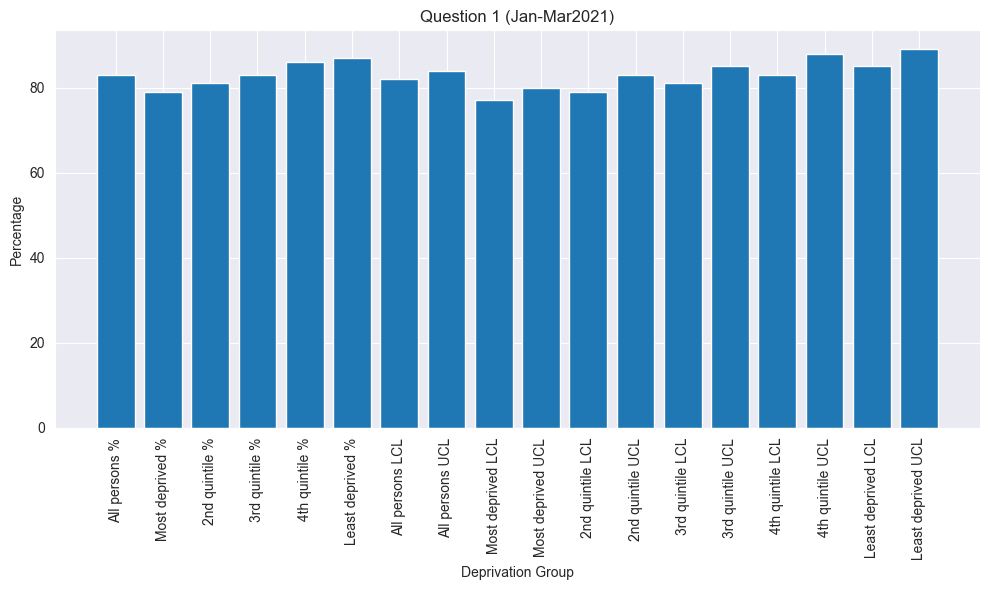

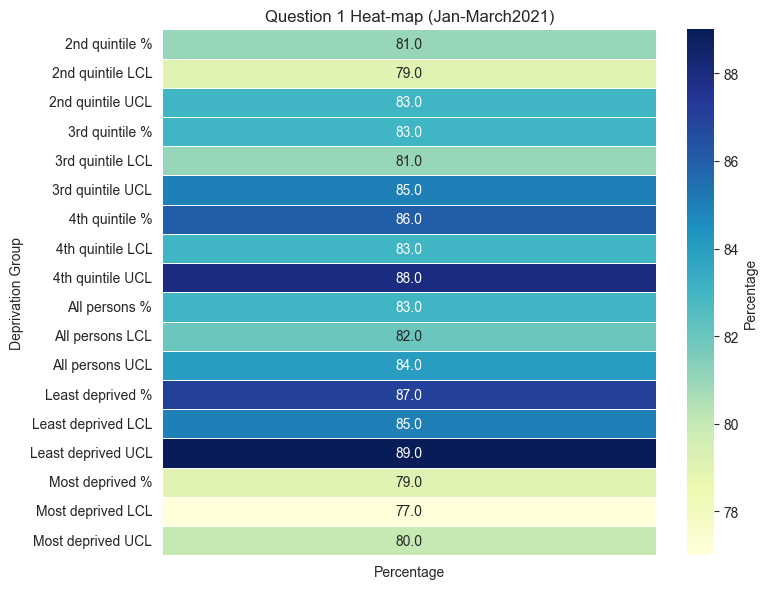

In [12]:
#plotting first question 
import pandas as pd
import matplotlib.pyplot as plt
#melting  dataframe for plotiing 

df_numeric = df.select_dtypes(include=['float', 'int']).iloc[0:1]

melted_df = pd.melt(
    df_numeric.reset_index(),
    var_name="Deprivation Group",
    value_name="Percentage"
)
#excluding index group
melted_df = melted_df[melted_df['Deprivation Group'] != 'index']
first_question = df.loc[1, 'questions']
first_response = df.loc[1, 'response']
print("1st Question:", first_question)
print("Response to the first Question:", first_response)

#plotting bar plot 
plt.figure(figsize=(10, 6))
plt.bar(melted_df['Deprivation Group'], melted_df['Percentage'])
plt.xlabel('Deprivation Group')
plt.ylabel('Percentage')
plt.title('Question 1 (Jan-Mar2021)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Converting to a pivot table for heatmap
heatmap_data = melted_df.pivot_table(
    index='Deprivation Group', 
    values='Percentage'
)

import seaborn as sns 
# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu",  # Choose a custom colormap
    linewidths=0.5,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Question 1 Heat-map (Jan-March2021)')
plt.xlabel("")
plt.ylabel("Deprivation Group")
plt.tight_layout()
plt.show()


Question 2
 2nd Question: Between January and March 2021, when you were in Year 11, schools were closed to most students as part of the national lockdown.
Did you attend school in person during this time, even if only for a few days or on a part-time basis?
Response to the second Question: Attended school in person


2nd Question: Between January and March 2021, when you were in Year 11, schools were closed to most students as part of the national lockdown.
Did you attend school in person during this time, even if only for a few days or on a part-time basis?
Response to the second Question: Attended school in person


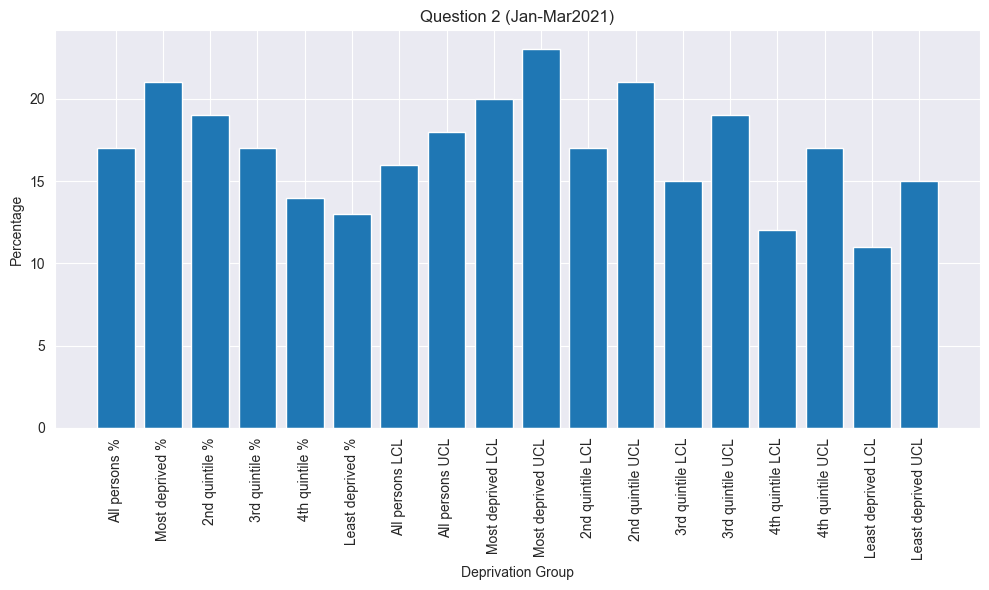

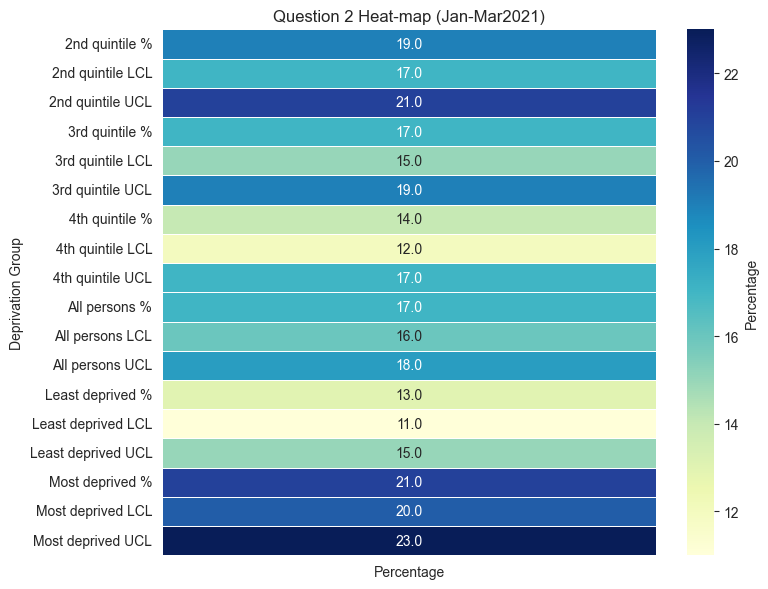

In [13]:
#plotting first question 
import pandas as pd
import matplotlib.pyplot as plt
#melting  dataframe for plotiing 

df_numeric = df.select_dtypes(include=['float', 'int']).iloc[1:2]

melted_df = pd.melt(
    df_numeric.reset_index(),
    var_name="Deprivation Group",
    value_name="Percentage"
)
#excluding index group
melted_df = melted_df[melted_df['Deprivation Group'] != 'index']
second_question = df.loc[2, 'questions']
second_response = df.loc[2, 'response']
print("2nd Question:", second_question)
print("Response to the second Question:", second_response)

#plotting bar plot 
plt.figure(figsize=(10, 6))
plt.bar(melted_df['Deprivation Group'], melted_df['Percentage'])
plt.xlabel('Deprivation Group')
plt.ylabel('Percentage')
plt.title('Question 2 (Jan-Mar2021)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Converting to a pivot table for heatmap
heatmap_data = melted_df.pivot_table(
    index='Deprivation Group', 
    values='Percentage'
)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu",  # Choose a custom colormap
    linewidths=0.5,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Question 2 Heat-map (Jan-Mar2021)')
plt.xlabel("")
plt.ylabel("Deprivation Group")
plt.tight_layout()
plt.show()


Question 15 
15th Question: Did your school provide you with any digital devices - for example a laptop, tablet or Chromebook - to help you study at home during the second period of disruption in Year 11, that is January to March 2021?
Response to the 15th Question: No


15th Question: Did your school provide you with any digital devices - for example a laptop, tablet or Chromebook - to help you study at home during the second period of disruption in Year 11, that is January to March 2021?
Response to the 15th Question: No


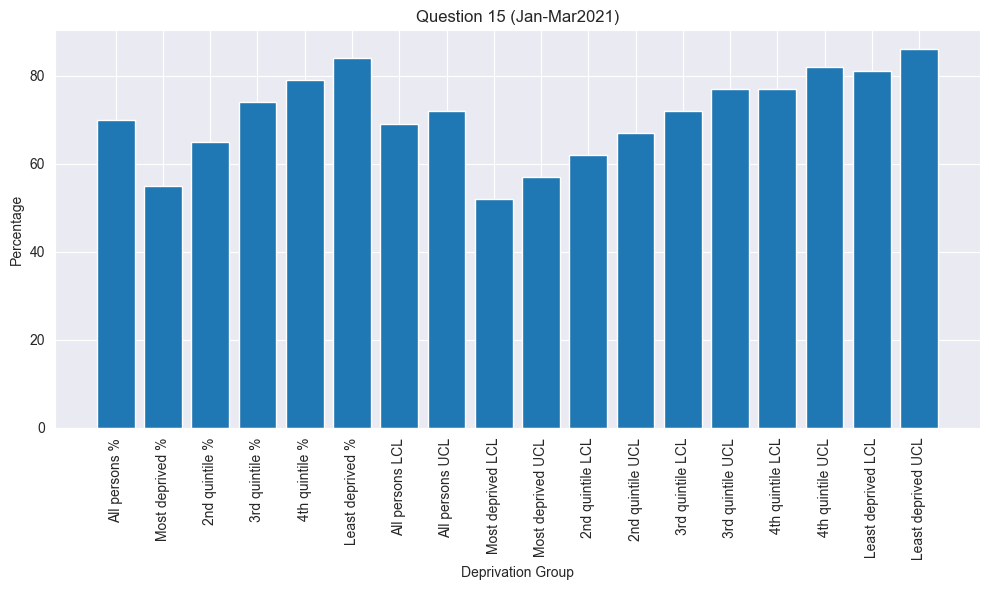

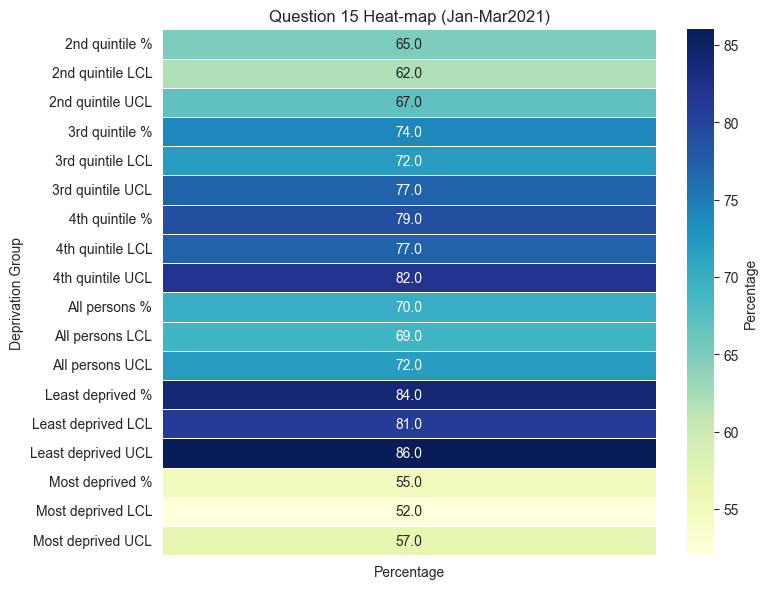

In [14]:
#plotting first question 
import pandas as pd
import matplotlib.pyplot as plt
#melting  dataframe for plotiing 

df_numeric = df.select_dtypes(include=['float', 'int']).iloc[14:15]

melted_df = pd.melt(
    df_numeric.reset_index(),
    var_name="Deprivation Group",
    value_name="Percentage"
)
#excluding index group
melted_df = melted_df[melted_df['Deprivation Group'] != 'index']
fifteenth_question = df.loc[15, 'questions']
fifteenth_response = df.loc[15, 'response']
print("15th Question:", fifteenth_question)
print("Response to the 15th Question:", fifteenth_response)

#plotting bar plot 
plt.figure(figsize=(10, 6))
plt.bar(melted_df['Deprivation Group'], melted_df['Percentage'])
plt.xlabel('Deprivation Group')
plt.ylabel('Percentage')
plt.title('Question 15 (Jan-Mar2021)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Converting to a pivot table for heatmap
heatmap_data = melted_df.pivot_table(
    index='Deprivation Group', 
    values='Percentage'
)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu",  # Choose a custom colormap
    linewidths=0.5,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Question 15 Heat-map (Jan-Mar2021)')
plt.xlabel("")
plt.ylabel("Deprivation Group")
plt.tight_layout()
plt.show()


question 27 
27th Question: And at any point during that time in Year 11 – that is, January to March 2021 – did you have any of these problems? [note 2]
Response to the 27th Question: I didn't have a suitable or quiet space to study or work


27th Question: And at any point during that time in Year 11 – that is, January to March 2021 – did you have any of these problems? [note 2]
Response to the 27th Question: I didn't have a suitable or quiet space to study or work


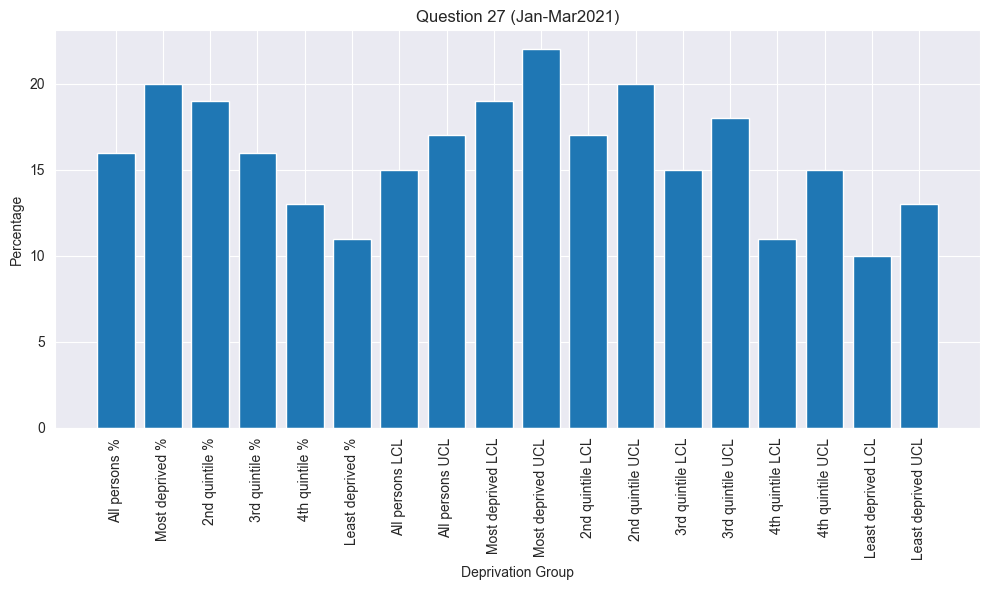

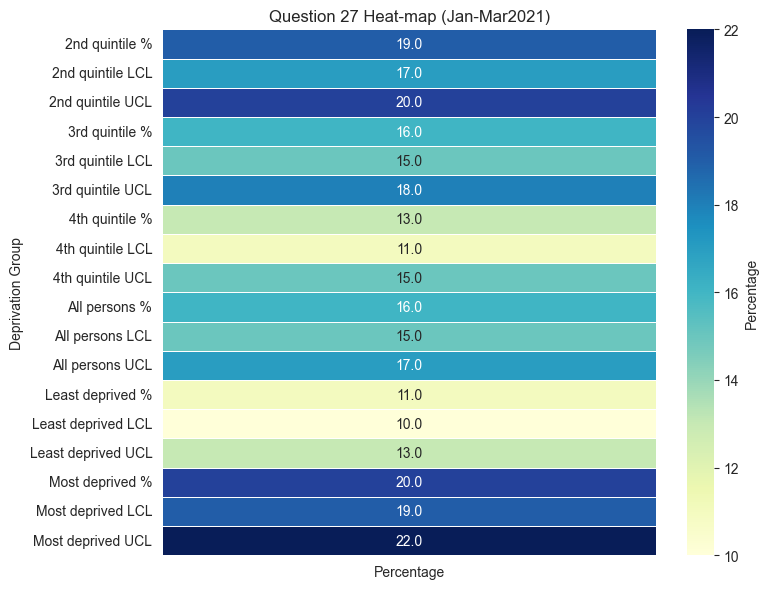

In [15]:
#plotting first question 
import pandas as pd
import matplotlib.pyplot as plt
#melting  dataframe for plotiing 

df_numeric = df.select_dtypes(include=['float', 'int']).iloc[26:27]

melted_df = pd.melt(
    df_numeric.reset_index(),
    var_name="Deprivation Group",
    value_name="Percentage"
)
#excluding index group
melted_df = melted_df[melted_df['Deprivation Group'] != 'index']
twentyseventh_question = df.loc[27, 'questions']
twentyseventh_response = df.loc[27, 'response']
print("27th Question:", twentyseventh_question)
print("Response to the 27th Question:", twentyseventh_response)

#plotting bar plot 
plt.figure(figsize=(10, 6))
plt.bar(melted_df['Deprivation Group'], melted_df['Percentage'])
plt.xlabel('Deprivation Group')
plt.ylabel('Percentage')
plt.title('Question 27 (Jan-Mar2021)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Converting to a pivot table for heatmap
heatmap_data = melted_df.pivot_table(
    index='Deprivation Group', 
    values='Percentage'
)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu",  # Choose a custom colormap
    linewidths=0.5,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Question 27 Heat-map (Jan-Mar2021)')
plt.xlabel("")
plt.ylabel("Deprivation Group")
plt.tight_layout()
plt.show()


question 28 


28th Question: And at any point during that time in Year 11 – that is, January to March 2021 – did you have any of these problems? [note 2]
Response to the 28th Question: Feeling unmotivated, struggled to engage with my studies or work


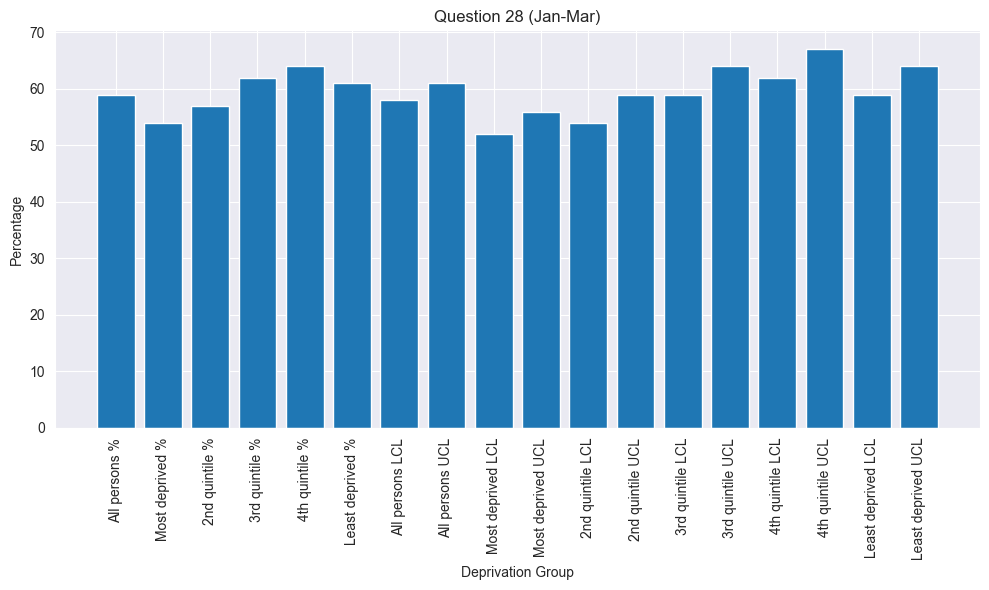

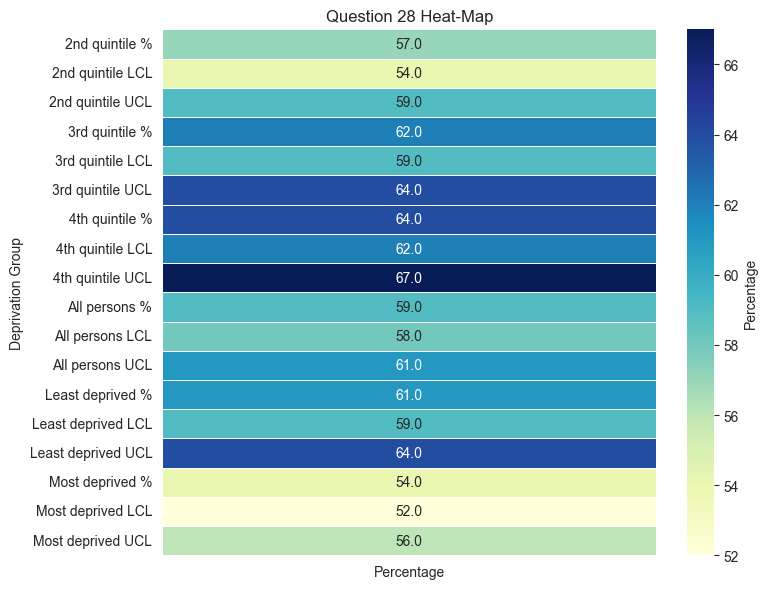

In [16]:
#plotting first question 
import pandas as pd
import matplotlib.pyplot as plt
#melting  dataframe for plotiing 

df_numeric = df.select_dtypes(include=['float', 'int']).iloc[27:28]

melted_df = pd.melt(
    df_numeric.reset_index(),
    var_name="Deprivation Group",
    value_name="Percentage"
)
#excluding index group
melted_df = melted_df[melted_df['Deprivation Group'] != 'index']
twentyeighth_question = df.loc[28, 'questions']
twentyeighth_response = df.loc[28, 'response']
print("28th Question:", twentyeighth_question)
print("Response to the 28th Question:", twentyeighth_response)

#plotting bar plot 
plt.figure(figsize=(10, 6))
plt.bar(melted_df['Deprivation Group'], melted_df['Percentage'])
plt.xlabel('Deprivation Group')
plt.ylabel('Percentage')
plt.title('Question 28 (Jan-Mar)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Converting to a pivot table for heatmap
heatmap_data = melted_df.pivot_table(
    index='Deprivation Group', 
    values='Percentage'
)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True, 
    fmt=".1f", 
    cmap="YlGnBu",  # Choose a custom colormap
    linewidths=0.5,
    cbar_kws={'label': 'Percentage'}
)
plt.title('Question 28 Heat-Map')
plt.xlabel("")
plt.ylabel("Deprivation Group")
plt.tight_layout()
plt.show()
